In [0]:
import pandas as pd
import numpy as np
df = pd.read_csv("trip.csv",sep=",")
df

,review_body,review_date
0,"Have to admit I am not a great fan of McDonalds but it is a great place for a quickish snack, I ...","February 29, 2020"
1,"Food was fine. Staff were undesirably rude!Family outing completely ruined by rude, disrespectfu...","February 15, 2020"
2,We went here to enjoy the Golden Arches fries. Easy to use touch screen ordering. But wish they ...,"November 5, 2019"
3,When I visited this McDonalds I was excited to see so many options that we don’t have on the men...,"November 2, 2019"
4,This restaurent was a mad uprade from the one back in the United Kingdom. My travel to France wa...,"October 2, 2019"
...,...,...
535,This place was packed for lunch. More registers going than any U.S. Mcdonalds. Try they pastries...,"January 31, 2012"
536,"Well if you're run out of idea or you need to eat very fast and looking something familiar, this...","December 14, 2011"
537,We were surprised to find a McD in Paris with a cafe sitting area on the Champs-Elysees. Food li...,"September 10, 2009"
538,We stopped when we were walking by because we had never seen such a large McDonalds with multipl...,"February 7, 2009"


In [0]:
#df.drop(columns=['Unnamed: 0'],inplace= True)
#df.head(2)

In [0]:
df.dropna(subset=['review_body'], inplace=True) #supprimer les lignes contenant Review null.

In [0]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package biocreative_ppi is already up-to-date!
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Package brown is already up-to-date!
[nltk_data]    | Downloading package brown_tei to /root/nltk_data...
[nltk_data]    |   Package brown_tei is already up-to-date!
[nltk_data]    | Downloading package cess_cat to /root/nltk_data...
[nltk_data]    |   Package cess_cat is already up-to-date!
[nltk_data]    | Downloading package cess_esp to /root/nltk_data...
[nltk_data]    |   Package cess_esp is already up-to-date!
[nltk_data]    | Downloading packag

True

In [0]:
import sys
# !{sys.executable} -m spacy download en
import re, numpy as np, pandas as pd
from pprint import pprint

# Gensim
import gensim
import spacy
import logging
import warnings
import gensim.corpora as corpora
from gensim.utils import lemmatize, simple_preprocess
from gensim.models import CoherenceModel
import matplotlib.pyplot as plt

# NLTK Stop words
from nltk.corpus import stopwords
#from spacy.lang.fr.stop_words import STOP_WORDS as fr_stop 
sp1 =stopwords.words('french')
sp2 =stopwords.words('english')

stop_words=sp1+sp2+['http', 'go', 'tell', 'make', 'elysee' , 'long', 'thing' , 'even', 'know', 'instead', 'would', 'speak', 'ever', 'get', 'ask', 'see', 'also', 'try' ,'https','bit','fr','was','com','to','of','are','or','gt','html','for','com','the','id','by','www','www','ly','in','is','with','amp','via','chez']

%matplotlib inline
warnings.filterwarnings("ignore",category=DeprecationWarning)
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

In [0]:
def sent_to_words(sentences):
    for sent in sentences:
        sent = re.sub('\S*@\S*\s?', '', sent)  # remove emails
        sent = re.sub('\s+', ' ', sent)  # remove newline chars
        sent = re.sub("\'", "", sent)  # remove single quotes
        sent = gensim.utils.simple_preprocess(str(sent), deacc=True) 
        yield(sent)  
# Convert to list
data = df.review_body.values.tolist()
data_words = list(sent_to_words(data))
print(data_words[:1])



[['have', 'to', 'admit', 'am', 'not', 'great', 'fan', 'of', 'mcdonalds', 'but', 'it', 'is', 'great', 'place', 'for', 'quickish', 'snack', 'doubt', 'it', 'can', 'really', 'be', 'classed', 'as', 'fast', 'food', 'establishment', 'anymore', 'the', 'one', 'on', 'the', 'champs', 'elysees', 'occupies', 'an', 'ideal', 'position', 'from', 'the', 'companys', 'point', 'of', 'view', 'just', 'mtrs', 'from', 'the', 'arc', 'de', 'triomphe', 'it', 'is', 'extremely', 'busy', 'but', 'large', 'restaurant', 'with', 'an', 'upstairs', 'seating', 'area', 'which', 'means', 'was', 'coping', 'even', 'at', 'lunchtime', 'the', 'food', 'was', 'no', 'different', 'to', 'any', 'other', 'mcdonalds', 'have', 'ever', 'visited', 'and', 'well', 'priced', 'compared', 'with', 'any', 'place', 'to', 'eat', 'near', 'paris', 'landmark', 'tourist', 'attraction', 'we', 'saw', 'coffee', 'on', 'sale', 'near', 'the', 'eifel', 'tower', 'at', 'euros', 'per', 'cup', 'were', 'charge', 'euros', 'for', 'cup', 'of', 'tea', 'small', 'beer',

In [0]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# !python3 -m spacy download en  # run in terminal once
# or do
# !conda install -c conda-forge spacy-model-en_core_web_md 
# and use nlp=spacy.load('en_core_web_sm') instead in below function.
def process_words(texts, stop_words=stop_words, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """Remove Stopwords, Form Bigrams, Trigrams and Lemmatization"""
    texts = [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]
    texts = [bigram_mod[doc] for doc in texts]
    texts = [trigram_mod[bigram_mod[doc]] for doc in texts]
    texts_out = []
    nlp = spacy.load('en', disable=['parser', 'ner'])
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    # remove stopwords once more after lemmatization
    texts_out = [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts_out]    
    return texts_out

data_ready = process_words(data_words)  # processed Text Data!

/usr/local/lib/python3.6/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


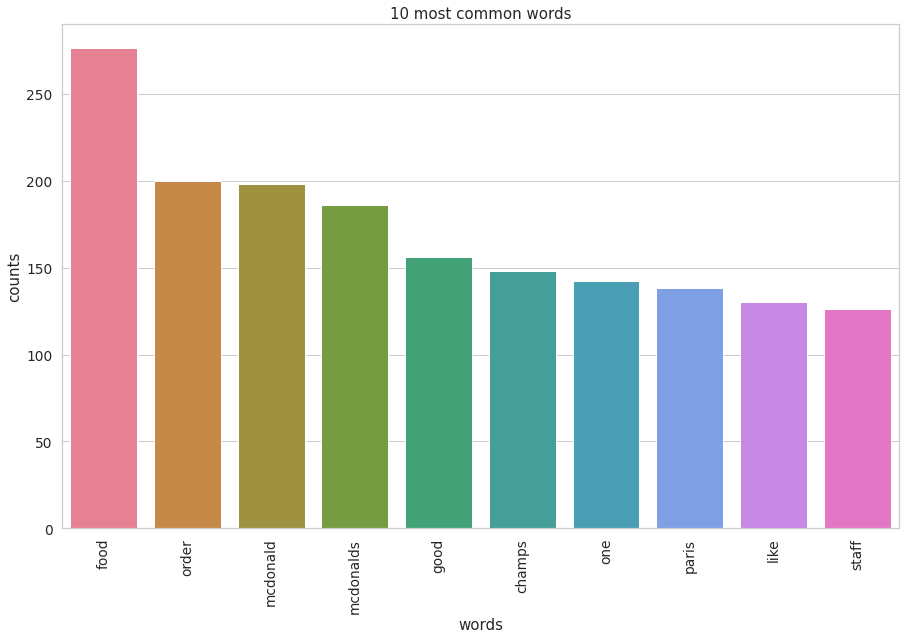

In [0]:
# Load the library with the CountVectorizer method
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

def plot_10_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:10]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='10 most common words')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()
# Initialise the count vectorizer with the English stop words
count_vectorizer = CountVectorizer(stop_words=stop_words )
# Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(data)
# Visualise the 10 most common words
plot_10_most_common_words(count_data, count_vectorizer)




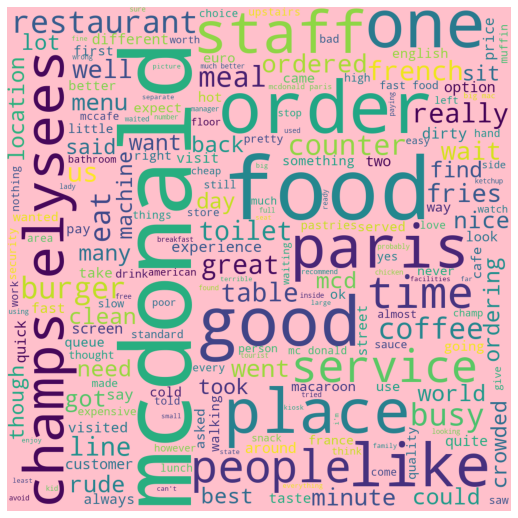

In [0]:
from wordcloud import WordCloud, STOPWORDS 
import sys,tweepy,csv,re
import matplotlib.pyplot as plt 
import pandas as pd 
  
comment_words = '' 
stop_word=stop_words+['ça','si']

# iterate through the csv file 
for val in df.review_body : 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 1000, height = 1000, 
                background_color ='pink', 
                stopwords = stop_word, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (7, 7), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off")
plt.tight_layout(pad = 0) 
  
plt.show() 

In [0]:
# Create Dictionary
id2word = corpora.Dictionary(data_ready)
id2word.filter_extremes(no_below=7, no_above=0.8, keep_n=1000000)
# Create Corpus: Term Document Frequency
corpus = [id2word.doc2bow(text) for text in data_ready]
tfidf = gensim.models.TfidfModel(corpus)
corpus_tfidf = tfidf[corpus]

# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus_tfidf,
                                           id2word=id2word,
                                           num_topics=4, 
                                           random_state=120,
                                           update_every=1,
                                           chunksize=10,
                                           passes=120,
                                           alpha='symmetric',
                                           iterations=70,
                                           per_word_topics=True)

pprint(lda_model.print_topics())

[(0,
  '0.020*"place" + 0.018*"people" + 0.017*"mcdonald" + 0.016*"food" + '
  '0.016*"good" + 0.016*"french" + 0.015*"eat" + 0.015*"clean" + 0.014*"champ" '
  '+ 0.012*"well"'),
 (1,
  '0.054*"crowd" + 0.033*"stop" + 0.030*"typical" + 0.028*"cheese" + '
  '0.026*"run" + 0.026*"hot" + 0.022*"table" + 0.019*"allow" + 0.019*"sell" + '
  '0.019*"drink"'),
 (2,
  '0.034*"bad" + 0.033*"dirty" + 0.029*"slow" + 0.029*"real" + 0.026*"rude" + '
  '0.025*"picture" + 0.021*"take" + 0.021*"staff" + 0.020*"crowded" + '
  '0.020*"happen"'),
 (3,
  '0.031*"table" + 0.024*"counter" + 0.023*"cake" + 0.021*"queue" + '
  '0.020*"surprise" + 0.018*"minute" + 0.018*"sit" + 0.018*"take" + '
  '0.017*"clear" + 0.017*"wrong"')]


In [0]:
num_topic=4
def get_lda_topics(model, num_topics):
    word_dict = {};
    for i in range(num_topics):
        words = model.show_topic(i, topn = 20);
        word_dict['Topic # ' + '{:02d}'.format(i+1)] = [i[0] for i in words];
    return pd.DataFrame(word_dict);
get_lda_topics(lda_model, num_topic)

,Topic # 01,Topic # 02,Topic # 03,Topic # 04
0,place,crowd,bad,table
1,people,stop,dirty,counter
2,mcdonald,typical,slow,cake
3,food,cheese,real,queue
4,good,run,rude,surprise
5,french,hot,picture,minute
6,eat,table,take,sit
7,clean,allow,staff,take
8,champ,sell,crowded,clear
9,well,drink,happen,wrong


In [0]:
def format_topics_sentences(ldamodel=None, corpus=corpus, texts=data):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic i each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=data_ready)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,0.0,0.8502,"place, people, mcdonald, food, good, french, eat, clean, champ, well","[admit, great, fan, mcdonald, great, place, snack, doubt, really, class, fast, food, establishme..."
1,1,2.0,0.7422,"bad, dirty, slow, real, rude, picture, take, staff, crowded, happen","[fine, staff, undesirably, rude, family, completely, ruin, rude, disrespectful, unpleasant, mana..."
2,2,0.0,0.5557,"place, people, mcdonald, food, good, french, eat, clean, champ, well","[enjoy, golden_arches, fry, easy, use, touch, screen, order, wish, cleaning, wipe, wash, screen,..."
3,3,0.0,0.6136,"place, people, mcdonald, food, good, french, eat, clean, champ, well","[visit, excite, many, option, however, blue, burger, fry, serve, barely, warm, cheese, slightly,..."
4,4,2.0,0.4076,"bad, dirty, slow, real, rude, picture, take, staff, crowded, happen","[restaurent, uprade, fancy, venture, chain, smell, wine, burger, body, pile, drive, chain, love,..."
5,5,0.0,0.8061,"place, people, mcdonald, food, good, french, eat, clean, champ, well","[wait, toilet, min, finally, wanted, pay, toilet, stall, use, people, grab, door, order, pay, st..."
6,6,0.0,0.6512,"place, people, mcdonald, food, good, french, eat, clean, champ, well","[call, stuff, good, burger]"
7,7,0.0,0.6773,"place, people, mcdonald, food, good, french, eat, clean, champ, well","[busy, service, fast, friendly, food, well, prepare, really, enjoy]"
8,8,3.0,0.4704,"table, counter, cake, queue, surprise, minute, sit, take, clear, wrong","[staff, appear, disorganize, unmotivated, overall, poor, experience, eat, food, prep, poor, work..."
9,9,0.0,0.4214,"place, people, mcdonald, food, good, french, eat, clean, champ, well","[cheese, egg, mcmuffin, coffee, sweet, stuff, muffin, unhealthy, clean, plenty, space, sit, note]"


In [0]:
# Display setting to show more characters in column
pd.options.display.max_colwidth = 100

sent_topics_sorteddf_mallet = pd.DataFrame()
sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=False).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Representative Text"]

# Show
sent_topics_sorteddf_mallet.head(10)

,Topic_Num,Topic_Perc_Contrib,Keywords,Representative Text
0,0.0,0.9672,"place, people, mcdonald, food, good, french, eat, clean, champ, well","[wish, mcdonald, look, decorum, nice, menu, better, seem, high, top, seat, upstairs, nice, view,..."
1,1.0,0.8742,"crowd, stop, typical, cheese, run, hot, table, allow, sell, drink","[typical, normal, time, really, growde, least]"
2,2.0,0.9122,"bad, dirty, slow, real, rude, picture, take, staff, crowded, happen","[bad, wait, min, food, cold, undercooke, awful, complain, back, messenger, email, address, send,..."
3,3.0,0.7860,"table, counter, cake, queue, surprise, minute, sit, take, clear, wrong","[friend, fall, busted, lip, ice, hand, help, wound, person, think, european, sense, help]"


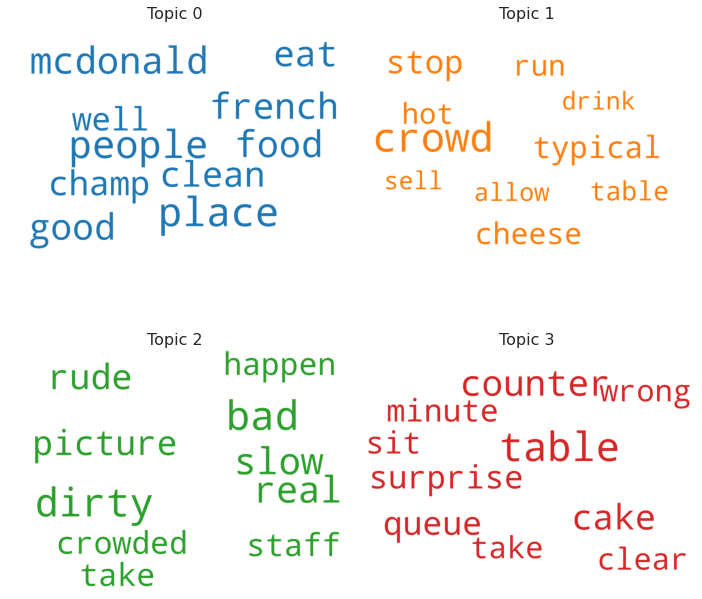

In [0]:
# 1. Wordcloud of Top N words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(2, 2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

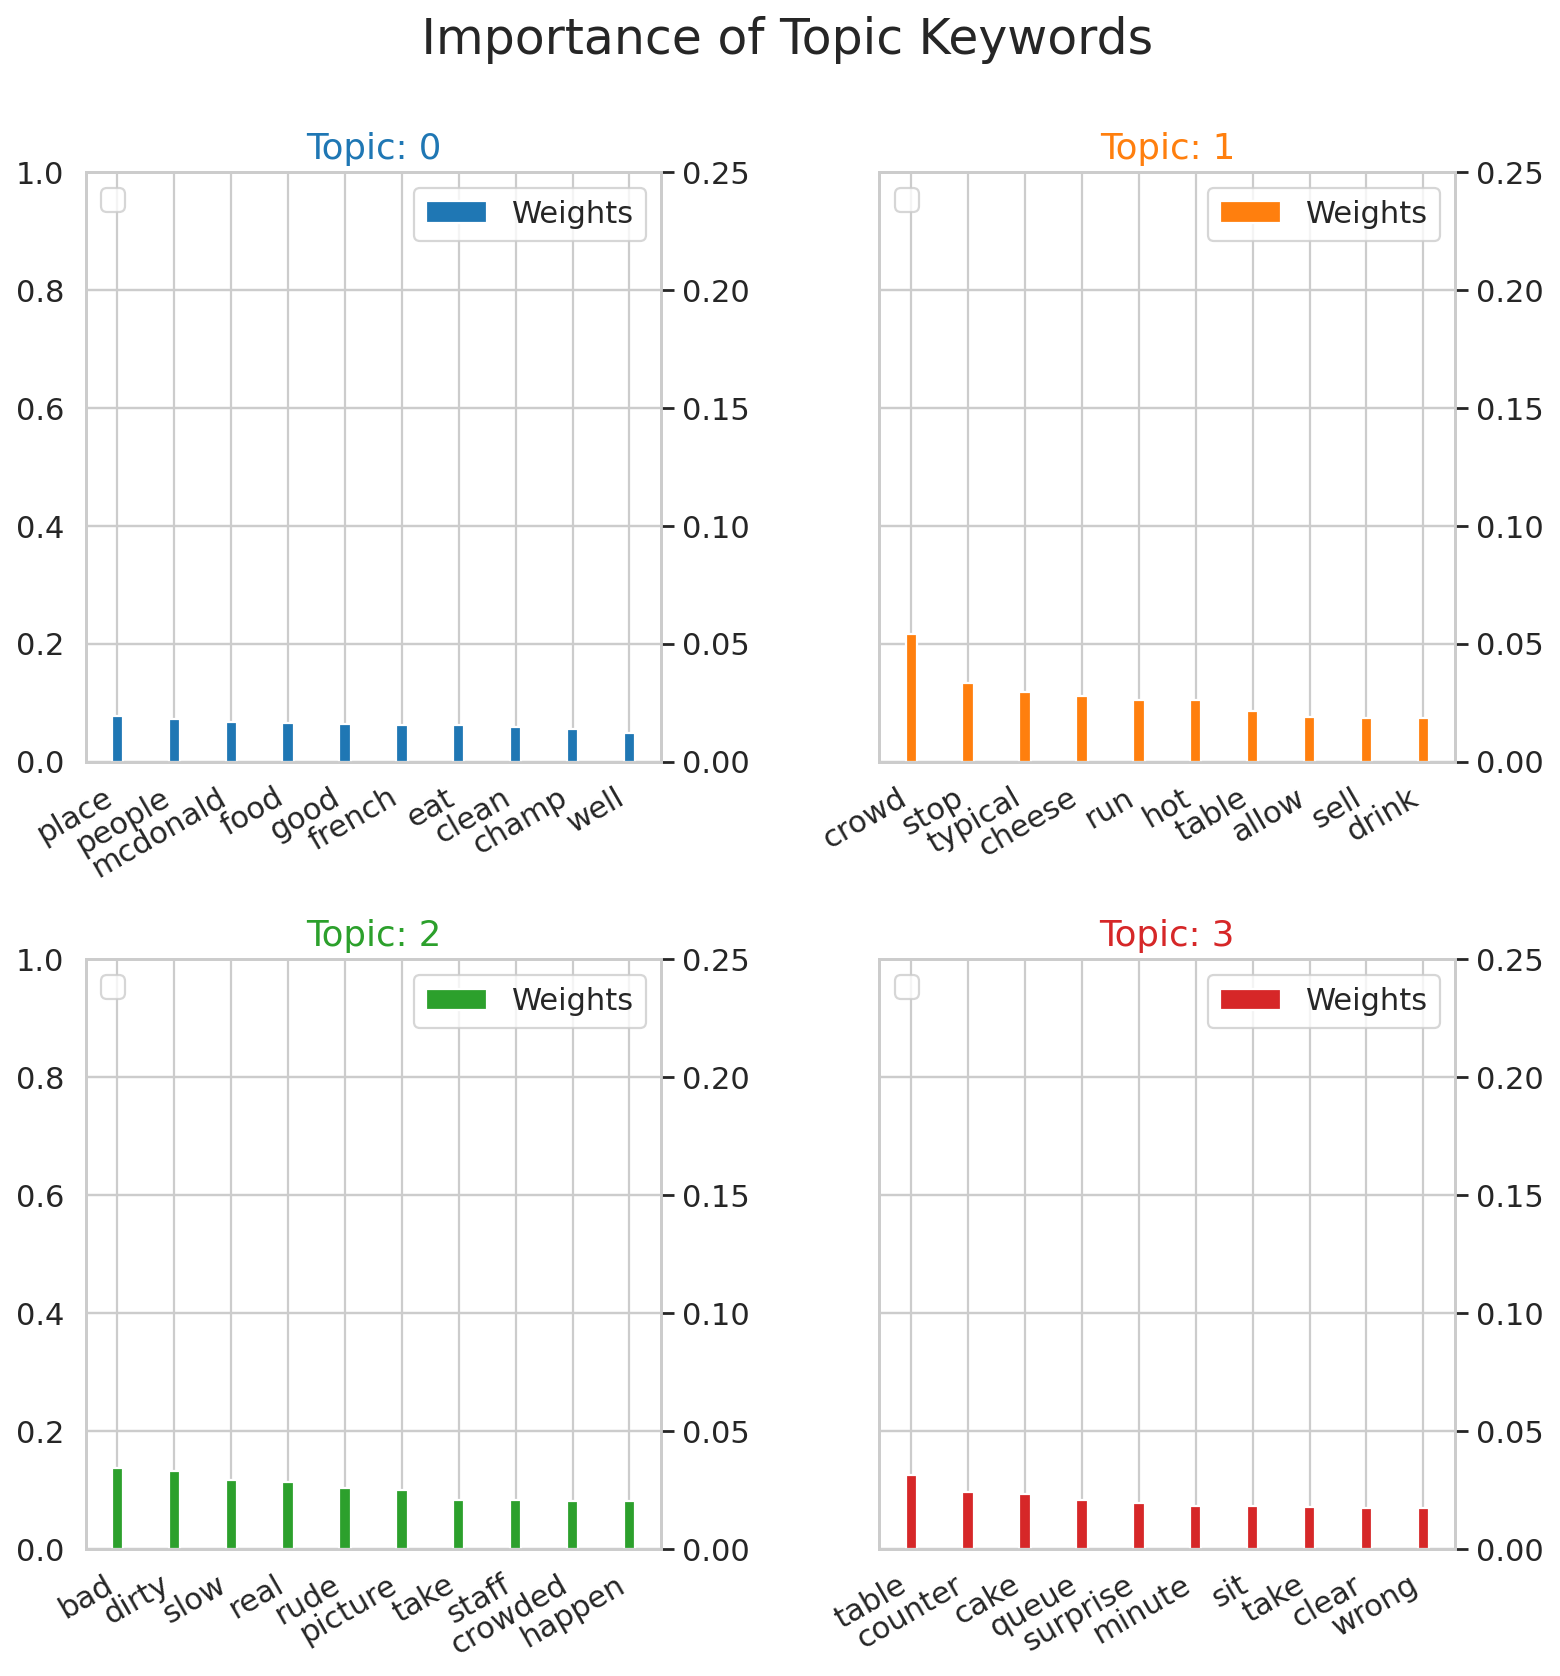

In [0]:
from collections import Counter
topics = lda_model.show_topics(formatted=False)
data_flat = [w for w_list in data_ready for w in w_list]
counter = Counter(data_flat)

out = []
for i, topic in topics:
    for word, weight in topic:
        out.append([word, i , weight, counter[word]])

df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])        

# Plot Word Count and Weights of Topic Keywords
fig, axes = plt.subplots(2, 2, figsize=(10,10), sharey=True, dpi=160)
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
for i, ax in enumerate(axes.flatten()):
    #ax.bar(x='word', height="word_count", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.5, alpha=0.3, label='Word Count')
    ax_twin = ax.twinx()
    ax_twin.bar(x='word', height="importance", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.2, label='Weights')
    #ax.set_ylabel('Word Count', color=cols[i])
    ax_twin.set_ylim(0, 0.25); 
    ax.set_title('Topic: ' + str(i), color=cols[i], fontsize=16)
    ax.tick_params(axis='y', left=False)
    ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
    ax.legend(loc='upper left'); ax_twin.legend(loc='upper right')

fig.tight_layout(w_pad=2)    
fig.suptitle(' Importance of Topic Keywords', fontsize=22, y=1.05)    
plt.show()

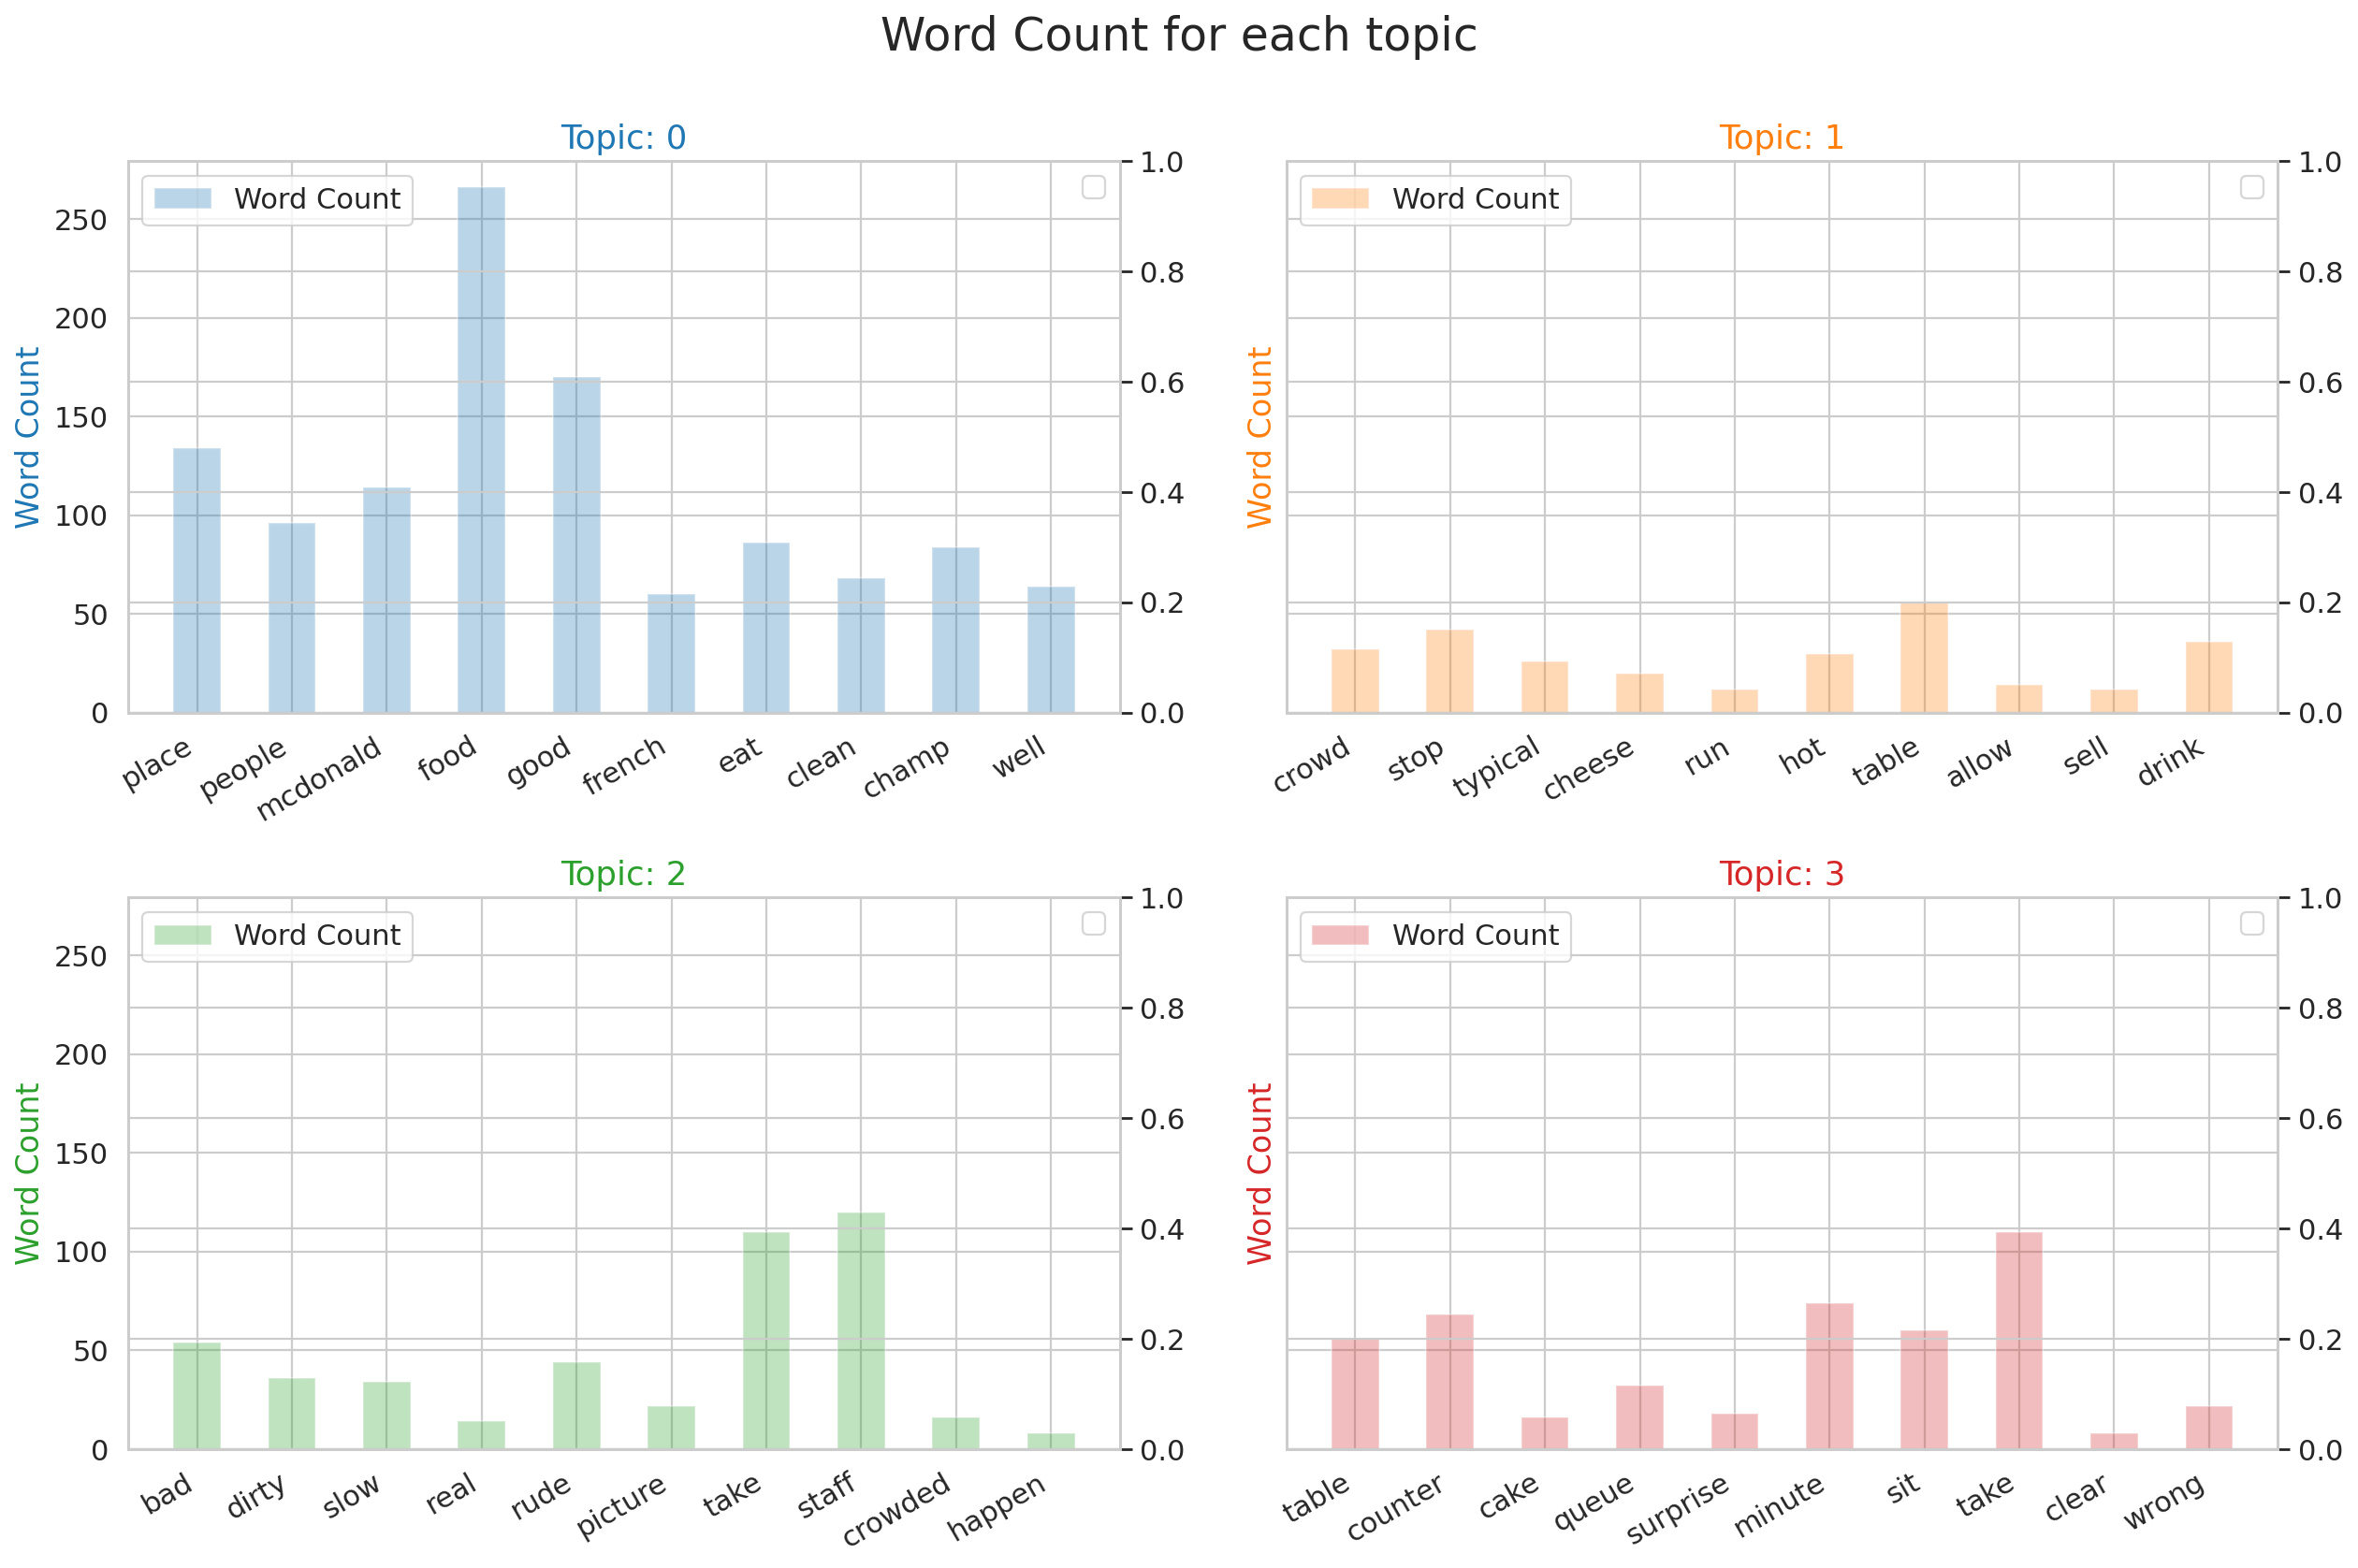

In [0]:
from collections import Counter
topics = lda_model.show_topics(formatted=False)
data_flat = [w for w_list in data_ready for w in w_list]
counter = Counter(data_flat)

out = []
for i, topic in topics:
    for word, weight in topic:
        out.append([word, i , weight, counter[word]])

df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])        

# Plot Word Count and Weights of Topic Keywords
fig, axes = plt.subplots(2, 2, figsize=(16,10), sharey=True, dpi=160)
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
for i, ax in enumerate(axes.flatten()):
    ax.bar(x='word', height="word_count", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.5, alpha=0.3, label='Word Count')
    ax_twin = ax.twinx()
    #ax_twin.bar(x='word', height="importance", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.2, label='Weights')
    ax.set_ylabel('Word Count', color=cols[i])
    #ax_twin.set_ylim(0, 0.030); ax.set_ylim(0, 3500)
    ax.set_title('Topic: ' + str(i), color=cols[i], fontsize=16)
    ax.tick_params(axis='y', left=False)
    ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
    ax.legend(loc='upper left'); ax_twin.legend(loc='upper right')

fig.tight_layout(w_pad=2)    
fig.suptitle('Word Count for each topic', fontsize=22, y=1.05)    
plt.show()

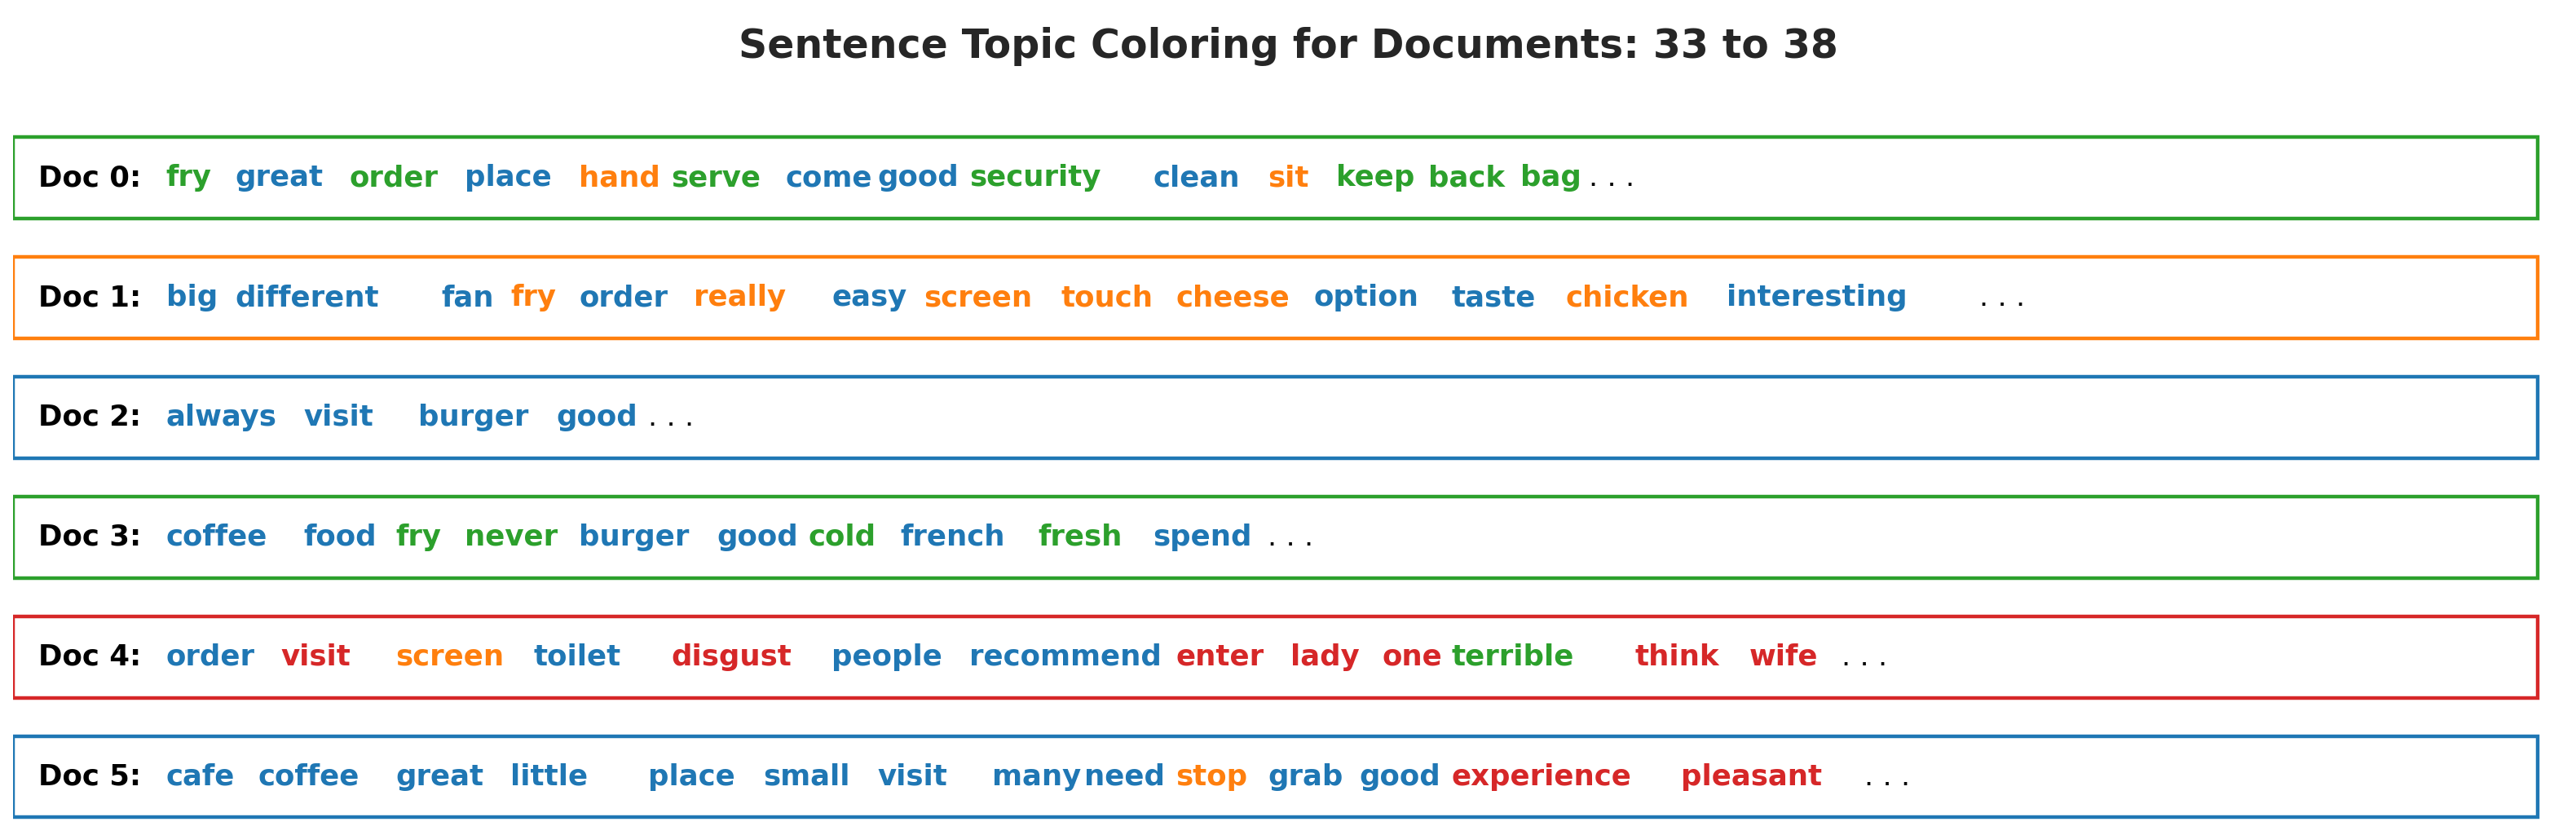

In [0]:
# Sentence Coloring of N Sentences
from matplotlib.patches import Rectangle

def sentences_chart(lda_model=lda_model, corpus=corpus_tfidf, start = 33, end = 40):
    corp = corpus[start:end]
    mycolors = [color for name, color in mcolors.TABLEAU_COLORS.items()]

    fig, axes = plt.subplots(end-start, 1, figsize=(20, (end-start)*0.95), dpi=160)       
    axes[0].axis('off')
    for i, ax in enumerate(axes):
        if i > 0:
            corp_cur = corp[i-1] 
            topic_percs, wordid_topics, wordid_phivalues = lda_model[corp_cur]
            word_dominanttopic = [(lda_model.id2word[wd], topic[0]) for wd, topic in wordid_topics]    
            ax.text(0.01, 0.5, "Doc " + str(i-1) + ": ", verticalalignment='center',
                    fontsize=16, color='black', transform=ax.transAxes, fontweight=700)

            # Draw Rectange
            topic_percs_sorted = sorted(topic_percs, key=lambda x: (x[1]), reverse=True)
            ax.add_patch(Rectangle((0.0, 0.05), 0.99, 0.90, fill=None, alpha=1, 
                                   color=mycolors[topic_percs_sorted[0][0]], linewidth=2))

            word_pos = 0.06
            for j, (word, topics) in enumerate(word_dominanttopic):
                if j < 14:
                    ax.text(word_pos, 0.5, word,
                            horizontalalignment='left',
                            verticalalignment='center',
                            fontsize=16, color=mycolors[topics],
                            transform=ax.transAxes, fontweight=700)
                    word_pos += .009 * len(word)  # to move the word for the next iter
                    ax.axis('off')
            ax.text(word_pos, 0.5, '. . .',
                    horizontalalignment='left',
                    verticalalignment='center',
                    fontsize=16, color='black',
                    transform=ax.transAxes)       

    plt.subplots_adjust(wspace=0, hspace=0)
    plt.suptitle('Sentence Topic Coloring for Documents: ' + str(start) + ' to ' + str(end-2), fontsize=22, y=0.95, fontweight=700)
    plt.tight_layout()
    plt.show()

sentences_chart() 

In [0]:
# Sentence Coloring of N Sentences
def topics_per_document(model, corpus, start=0, end=1):
    corpus_sel = corpus[start:end]
    dominant_topics = []
    topic_percentages = []
    for i, corp in enumerate(corpus_sel):
        topic_percs, wordid_topics, wordid_phivalues = model[corp]
        dominant_topic = sorted(topic_percs, key = lambda x: x[1], reverse=True)[0][0]
        dominant_topics.append((i, dominant_topic))
        topic_percentages.append(topic_percs)
    return(dominant_topics, topic_percentages)

dominant_topics, topic_percentages = topics_per_document(model=lda_model, corpus=corpus, end=-1)            

# Distribution of Dominant Topics in Each Document
df = pd.DataFrame(dominant_topics, columns=['Document_Id', 'Dominant_Topic'])
dominant_topic_in_each_doc = df.groupby('Dominant_Topic').size()
df_dominant_topic_in_each_doc = dominant_topic_in_each_doc.to_frame(name='count').reset_index()

# Total Topic Distribution by actual weight
topic_weightage_by_doc = pd.DataFrame([dict(t) for t in topic_percentages])
df_topic_weightage_by_doc = topic_weightage_by_doc.sum().to_frame(name='count').reset_index()

# Top 3 Keywords for each Topic
topic_top3words = [(i, topic) for i, topics in lda_model.show_topics(formatted=False) 
                                 for j, (topic, wt) in enumerate(topics) if j < 3]

df_top3words_stacked = pd.DataFrame(topic_top3words, columns=['topic_id', 'words'])
df_top3words = df_top3words_stacked.groupby('topic_id').agg(', \n'.join)
df_top3words.reset_index(level=0,inplace=True)

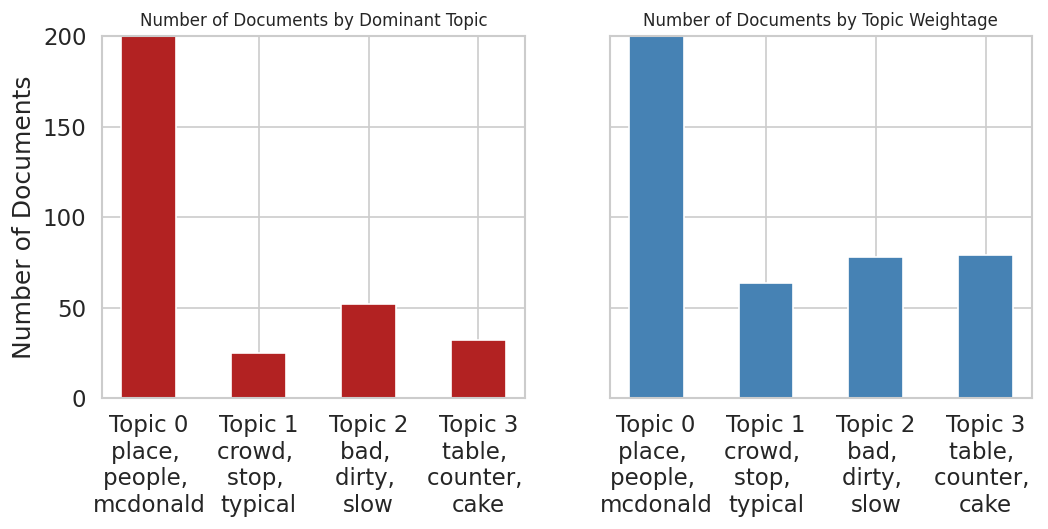

In [0]:
from matplotlib.ticker import FuncFormatter

# Plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4), dpi=120, sharey=True)

# Topic Distribution by Dominant Topics
ax1.bar(x='Dominant_Topic', height='count', data=df_dominant_topic_in_each_doc, width=.5, color='firebrick')
ax1.set_xticks(range(df_dominant_topic_in_each_doc.Dominant_Topic.unique().__len__()))
tick_formatter = FuncFormatter(lambda x, pos: 'Topic ' + str(x)+ '\n' + df_top3words.loc[df_top3words.topic_id==x, 'words'].values[0])
ax1.xaxis.set_major_formatter(tick_formatter)
ax1.set_title('Number of Documents by Dominant Topic', fontdict=dict(size=10))
ax1.set_ylabel('Number of Documents')
ax1.set_ylim(0, 200)

# Topic Distribution by Topic Weights
ax2.bar(x='index', height='count', data=df_topic_weightage_by_doc, width=.5, color='steelblue')
ax2.set_xticks(range(df_topic_weightage_by_doc.index.unique().__len__()))
ax2.xaxis.set_major_formatter(tick_formatter)
ax2.set_title('Number of Documents by Topic Weightage', fontdict=dict(size=10))

plt.show()

In [0]:
# Number of Documents for Each Topic
topic_counts = df_topic_sents_keywords['Dominant_Topic'].value_counts()

# Percentage of Documents for Each Topic
topic_contribution = round(topic_counts/topic_counts.sum(), 4)

# Topic Number and Keywords
topic_num_keywords = df_topic_sents_keywords[['Dominant_Topic', 'Topic_Keywords']]

# Concatenate Column wise
df_dominant_topics = pd.concat([topic_num_keywords, topic_counts, topic_contribution], axis=1)

# Change Column names
df_dominant_topics.columns = ['Dominant_Topic', 'Topic_Keywords', 'Num_Documents', 'Perc_Documents']

# Show
df_dominant_topics

,Dominant_Topic,Topic_Keywords,Num_Documents,Perc_Documents
0.0,0.0,"place, people, mcdonald, food, good, french, eat, clean, champ, well",430.0,0.7963
1.0,2.0,"bad, dirty, slow, real, rude, picture, take, staff, crowded, happen",26.0,0.0481
2.0,0.0,"place, people, mcdonald, food, good, french, eat, clean, champ, well",52.0,0.0963
3.0,0.0,"place, people, mcdonald, food, good, french, eat, clean, champ, well",32.0,0.0593
4.0,2.0,"bad, dirty, slow, real, rude, picture, take, staff, crowded, happen",NaN,NaN
...,...,...,...,...
535.0,0.0,"place, people, mcdonald, food, good, french, eat, clean, champ, well",NaN,NaN
536.0,0.0,"place, people, mcdonald, food, good, french, eat, clean, champ, well",NaN,NaN
537.0,0.0,"place, people, mcdonald, food, good, french, eat, clean, champ, well",NaN,NaN
538.0,0.0,"place, people, mcdonald, food, good, french, eat, clean, champ, well",NaN,NaN


In [0]:
pip install pyLDAvis

In [0]:
import pyLDAvis.gensim
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, dictionary=lda_model.id2word)
vis


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.258398  0.037722       1        1  59.946163
3     -0.166849  0.117315       2        1  15.884161
2     -0.055664 -0.215547       3        1  14.060420
1     -0.035885  0.060510       4        1  10.109259, topic_info=        Term       Freq      Total Category  logprob  loglift
260    crowd  55.000000  55.000000  Default  30.0000  30.0000
203    table  70.000000  70.000000  Default  29.0000  29.0000
3        bad  49.000000  49.000000  Default  28.0000  28.0000
270    dirty  47.000000  47.000000  Default  27.0000  27.0000
93      stop  35.000000  35.000000  Default  26.0000  26.0000
..       ...        ...        ...      ...      ...      ...
24       fry  11.990228  37.161690   Topic4  -4.3801   1.1605
113  service  12.484794  53.318295   Topic4  -4.3397   0.8400
7       busy  11.526472  53.769646   Topic4  -4.4195   0.7517
162     time  10.881783  57.683315   Topic4  -4.4771   0.6238
64     staff   9.872299  46.570984   Topic4  -4.5744   0.7405

[176 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
276       1  0.045221    allow
276       2  0.045221    allow
276       3  0.045221    allow
276       4  0.813980    allow
204       1  0.049138  already
...     ...       ...      ...
250       4  0.034091    wrong
329       1  0.046954    young
329       2  0.845173    young
329       3  0.046954    young
329       4  0.046954    young

[560 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 4, 3, 2])

In [0]:
#!pip install pyLDAvis

##  Topic modeling with NMF

In [0]:
import pandas as pd;
import numpy as np;
import scipy as sp;
import sklearn;
import sys;
from nltk.corpus import stopwords;
import nltk;
from gensim.models import ldamodel
import gensim.corpora;
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer;
from sklearn.decomposition import NMF;
from sklearn.preprocessing import normalize;
import pickle;

In [0]:
train_headlines_sentences = [' '.join(text) for text in data_ready]

In [0]:
vectorizer = CountVectorizer(analyzer='word', max_features=5000);
x_counts = vectorizer.fit_transform(train_headlines_sentences);

In [0]:
transformer = TfidfTransformer(smooth_idf=False);
x_tfidf = transformer.fit_transform(x_counts);

In [0]:
xtfidf_norm = normalize(x_tfidf, norm='l1', axis=1)


In [0]:
#obtain a NMF model.
model = NMF(n_components=4, init='nndsvd',shuffle=True);
#fit the model
model.fit(xtfidf_norm)

NMF(alpha=0.0, beta_loss='frobenius', init='nndsvd', l1_ratio=0.0, max_iter=200,
    n_components=4, random_state=None, shuffle=True, solver='cd', tol=0.0001,
    verbose=0)

In [0]:
def get_nmf_topics(model, n_top_words):
    
    #the word ids obtained need to be reverse-mapped to the words so we can print the topic names.
    feat_names = vectorizer.get_feature_names()
    
    word_dict = {};
    for i in range(4):
        
        #for each topic, obtain the largest values, and add the words they map to into the dictionary.
        words_ids = model.components_[i].argsort()[:-20 - 1:-1]
        words = [feat_names[key] for key in words_ids]
        word_dict['Topic # ' + '{:02d}'.format(i+1)] = words;
    
    return pd.DataFrame(word_dict);

In [0]:
get_nmf_topics(model, 20)

,Topic # 01,Topic # 02,Topic # 03,Topic # 04
0,order,typical,clean,surprise
1,good,irony,place,street
2,really,service,food,mcdonald
3,service,growde,discipline,full
4,people,normal,waiter,already
5,time,least,come,normal
6,eat,really,sub,still
7,staff,sell,dirty,case
8,busy,time,sit,tatty
9,food,addition,table,quite
